In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_df = pd.read_csv("Chicago.csv", index_col="DATE")
weather_df

,STATION,NAME,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN
DATE,,,,,,,,,,
1/1/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,NaN,NaN,38.0,47.0,28.0,NaN
1/2/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,NaN,NaN,48.0,60.0,35.0,NaN
1/3/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,NaN,NaN,34.0,38.0,30.0,NaN
1/4/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,NaN,NaN,25.0,30.0,19.0,NaN
1/5/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,NaN,NaN,17.0,25.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12/27/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,NaN,NaN,NaN,45.0,31.0,NaN
12/28/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,NaN,NaN,NaN,35.0,29.0,NaN
12/29/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,NaN,NaN,NaN,35.0,27.0,NaN


### Data cleaning:

In [3]:
# Calculating the total number of null values in the weather dataset

weather_df.apply(pd.isnull).sum()

STATION       0
NAME          0
AWND         16
PRCP         21
SNOW       7827
SNWD       7766
TAVG       6012
TMAX         51
TMIN         51
TSUN       6780
dtype: int64

In [4]:
# Calculating the percentage of missing values in each column

null_percent= weather_df.apply(pd.isnull).sum()/weather_df.shape[0]
null_percent

STATION    0.000000
NAME       0.000000
AWND       0.001992
PRCP       0.002615
SNOW       0.974477
SNWD       0.966882
TAVG       0.748506
TMAX       0.006350
TMIN       0.006350
TSUN       0.844124
dtype: float64

In [5]:
# Selecting columns whose missing values are less than 5%

valid_columns = weather_df.columns[null_percent < 0.05]
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [6]:
# Selecting the valid columns only

weather_df = weather_df[valid_columns].copy()
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN
DATE,,,,,,
1/1/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,47.0,28.0
1/2/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,60.0,35.0
1/3/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,38.0,30.0
1/4/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,30.0,19.0
1/5/2000,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,25.0,9.0
...,...,...,...,...,...,...
12/27/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0
12/28/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0
12/29/2021,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0


In [7]:
weather_df.apply(pd.isnull).sum()

STATION     0
NAME        0
AWND       16
PRCP       21
TMAX       51
TMIN       51
dtype: int64

In [8]:
 # Filling the mssing values with linear interpolation
    
weather_df = weather_df.fillna({'AWND':weather_df['AWND'].interpolate(method='linear') })
weather_df = weather_df.fillna({'PRCP':weather_df['PRCP'].interpolate(method='linear') })
weather_df = weather_df.fillna({'TMAX':weather_df['TMAX'].interpolate(method='linear') })
weather_df = weather_df.fillna({'TMIN':weather_df['TMIN'].interpolate(method='linear') })

In [9]:
# Checking for missing values again
weather_df.apply(pd.isnull).sum()

STATION    0
NAME       0
AWND       0
PRCP       0
TMAX       0
TMIN       0
dtype: int64

In [10]:
weather_df.dtypes

STATION     object
NAME        object
AWND       float64
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [11]:
weather_df.index

Index(['1/1/2000', '1/2/2000', '1/3/2000', '1/4/2000', '1/5/2000', '1/6/2000',
       '1/7/2000', '1/8/2000', '1/9/2000', '1/10/2000',
       ...
       '12/22/2021', '12/23/2021', '12/24/2021', '12/25/2021', '12/26/2021',
       '12/27/2021', '12/28/2021', '12/29/2021', '12/30/2021', '12/31/2021'],
      dtype='object', name='DATE', length=8032)

In [12]:
# Converting index to date time

weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='DATE', length=8032, freq=None)

In [13]:
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN
DATE,,,,,,
2000-01-01,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,47.0,28.0
2000-01-02,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,60.0,35.0
2000-01-03,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,38.0,30.0
2000-01-04,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,30.0,19.0
2000-01-05,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,25.0,9.0
...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0


In [14]:
# Checking if there is any gap in the data 

weather_df.index.year.value_counts().sort_index()

2000    364
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    364
2019    365
2020    366
2021    365
Name: DATE, dtype: int64

In [15]:
# Setting the target column in weather dataset which is Tmax

weather_df['target']=weather_df.shift(-1)['TMAX']
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN,target
DATE,,,,,,,
2000-01-01,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,47.0,28.0,60.0
2000-01-02,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,60.0,35.0,38.0
2000-01-03,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,38.0,30.0,30.0
2000-01-04,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,30.0,19.0,25.0
2000-01-05,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,25.0,9.0,38.0
...,...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0,35.0
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0,35.0
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0,35.0


In [16]:
# Filling the last Nan 
weather_df=weather_df.ffill()

In [17]:
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN,target
DATE,,,,,,,
2000-01-01,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,47.0,28.0,60.0
2000-01-02,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,60.0,35.0,38.0
2000-01-03,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,38.0,30.0,30.0
2000-01-04,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,30.0,19.0,25.0
2000-01-05,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,25.0,9.0,38.0
...,...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0,35.0
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0,35.0
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0,35.0


### Data Visualisation:

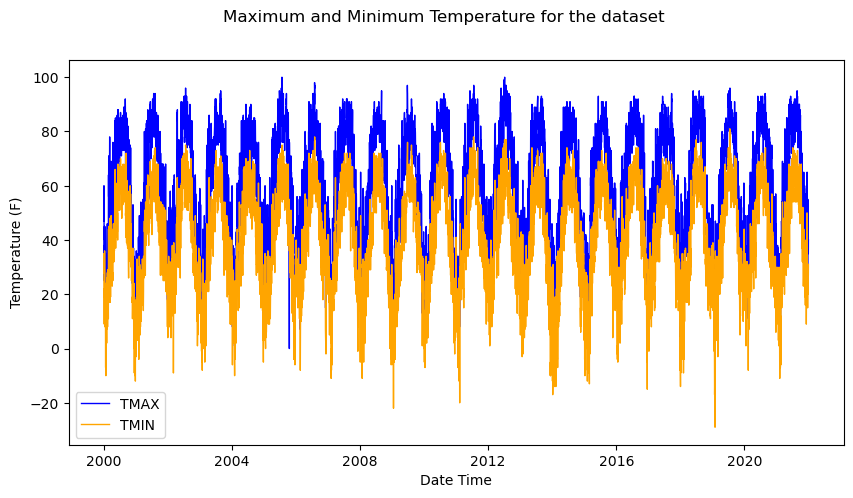

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting minimum and maximum temperature to check noisy data 

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Maximum and Minimum Temperature for the dataset',fontsize=12)

ax.plot(weather_df['TMAX'], linewidth=1.0, color = 'Blue', label = "TMAX")
ax.plot(weather_df['TMIN'], linewidth=1.0, color = 'Orange', label = "TMIN")

ax.legend()

ax.set( xlabel="Date Time",
        ylabel="Temperature (F)")

plt.show()
plt.tight_layout()

In [19]:
# To observe the correlation of the data set 
weather_df.corr()

C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\384044887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_df.corr()


,AWND,PRCP,TMAX,TMIN,target
AWND,1.000000,0.092996,-0.261809,-0.206877,-0.353219
PRCP,0.092996,1.000000,0.120010,0.192767,0.076708
TMAX,-0.261809,0.120010,1.000000,0.937005,0.929511
TMIN,-0.206877,0.192767,0.937005,1.000000,0.886295
target,-0.353219,0.076708,0.929511,0.886295,1.000000


C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\1062436361.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)


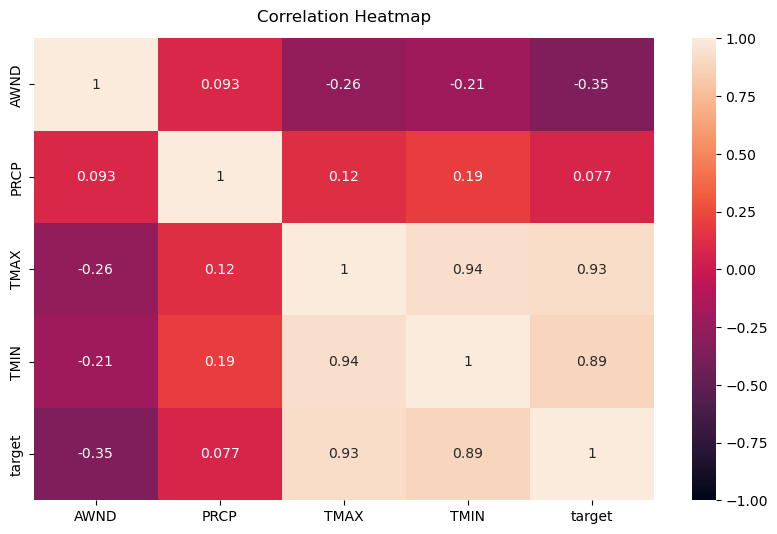

In [20]:
# Data Visualization

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Functions for Linear Regression Models:

In [21]:
from sklearn.linear_model import Ridge
model_1 = Ridge(alpha=0.1)

def ridge_predictor(weather_df, model, predictors, start=7667, step=90):
    
    all_predictions=[]
    
    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]
        
        model_1.fit(train[predictors], train['target'])
        
        preds = model_1.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)
        
        combined.columns=["actual", "prediction"]
        
        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()   
        
        all_predictions.append(combined)
    
    return pd.concat(all_predictions)


In [22]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()

def linear_predictor(weather_df, model, predictors, start=7667, step=90):
    
    all_predictions=[]
    
    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]
        
        model_2.fit(train[predictors], train['target'])
        
        preds = model_2.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)
        
        combined.columns=["actual", "prediction"]
        
        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()   
        
        all_predictions.append(combined)
    
    return pd.concat(all_predictions)


In [23]:
from sklearn.linear_model import Lasso
model_3 = Lasso(alpha=0.1)

def lasso_predictor(weather_df, model, predictors, start=7667, step=90):
    
    all_predictions=[]
    
    for i in range(start, weather_df.shape[0], step):
        train = weather_df.iloc[:i,:]
        test = weather_df.iloc[i:(i+step),:]
        
        model_3.fit(train[predictors], train['target'])
        
        preds = model_3.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test['target'], preds], axis=1)
        
        combined.columns=["actual", "prediction"]
        
        combined["difference"] = (combined["actual"]-combined["prediction"]).abs()   
        
        all_predictions.append(combined)
    
    return pd.concat(all_predictions)


### Functions for data visualization after getting predictions:

In [24]:
def lineplot(df):

    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle('Actual vs Predicted values',fontsize=12)

    ax.plot(df['actual'],  linewidth=2.0,label = "Actual")
    ax.plot(df['prediction'], color = 'Orange', linewidth=2.0, label = "Predicted")

    ax.legend()

    ax.set( xlabel="Date Time",
            ylabel=" Maximum Temperature (F)")

    plt.show()
    plt.tight_layout()

In [25]:
def violinplot(df):
    fig, ax = plt.subplots(figsize=(5,5))
    fig.suptitle('Violin plot for actual vs predicted values',fontsize=12)
    ax.set( ylabel=" Maximum Temperature (F)")
    sns.violinplot(df[["actual","prediction"]])

In [26]:
def errorgraph(df):
    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle('Error graph',fontsize=12)

    ax.plot(df["difference"].round().value_counts().sort_index(), linewidth=1.0)

    ax.set( xlabel="Error in prediction",
            ylabel="Count of values")

    plt.show()
    plt.tight_layout()

### Functions for calculating errors and accuracy of the model

In [27]:
def rmse_error(actual, predicted):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    mse= mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse

In [28]:
def r2_error(actual, predicted):
    from sklearn.metrics import r2_score
    r2 = r2_score(actual, predicted)
    return r2

In [29]:
def mab_error(actual, predicted):
    from sklearn.metrics import mean_absolute_error as mae
    error = mae(actual, predicted)
    return error

## Ridge Regression - Model 1: ( 'AWND', 'PRCP', 'TMAX', 'TMIN' )

In [30]:
# Generating columns as predictors for model

predictors_1 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_1

Index(['AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [31]:
# Calling the ride_predictor function to get the predicted values

predictions_1 = ridge_predictor(weather_df, model_1, predictors_1)
predictions_1

,actual,prediction,difference
DATE,,,
2021-01-01,33.0,33.074584,0.074584
2021-01-02,32.0,39.711366,7.711366
2021-01-03,28.0,37.502457,9.502457
2021-01-04,33.0,33.702914,0.702914
2021-01-05,36.0,40.378419,4.378419
...,...,...,...
2021-12-27,35.0,45.607987,10.607987
2021-12-28,35.0,40.582305,5.582305
2021-12-29,35.0,39.769265,4.769265


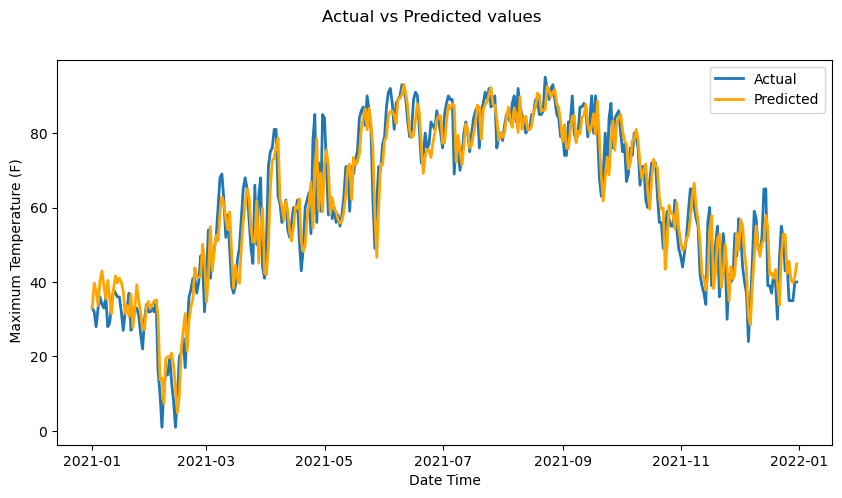

<Figure size 640x480 with 0 Axes>

In [32]:
lineplot(predictions_1) # calling lineplot() function created 

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


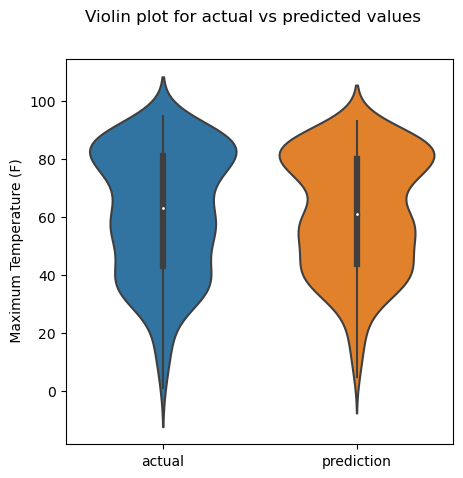

In [33]:
violinplot(predictions_1) # calling violinplot() function created

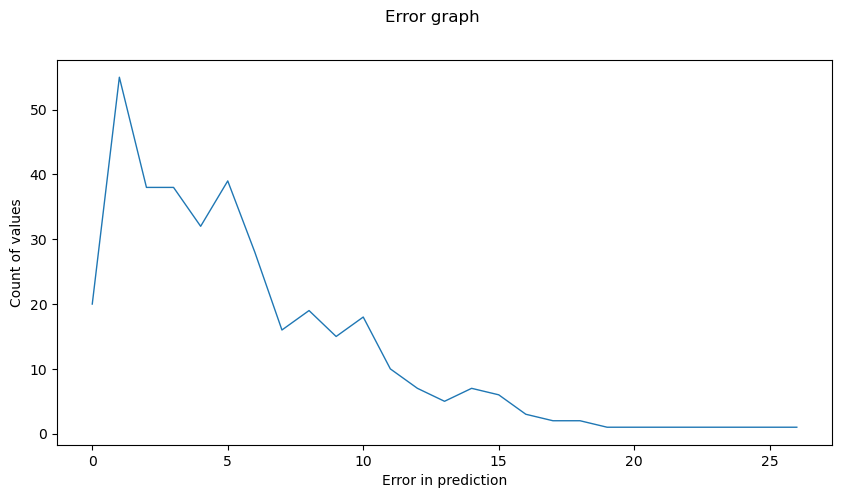

<Figure size 640x480 with 0 Axes>

In [34]:
errorgraph(predictions_1)

In [35]:
error = rmse_error(predictions_1['actual'],predictions_1['prediction'])
print("Root mean square error : ", error)

Root mean square error :  7.088705257205736


In [36]:
error = r2_error(predictions_1['actual'],predictions_1['prediction'])
print("R2 score error : ", error)

R2 score error :  0.8933234190424585


In [37]:
error = mab_error(predictions_1['actual'],predictions_1['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  5.450387122204187


###  Rolling mean function add columns to improve accuracy

In [38]:
# rolling() function calculates the rolling mean for the number of days mentioned

def rolling(weather_df, days, col):
    new_col = f"Rolling_{days}_{col}"
    weather_df[new_col] = weather_df[col].rolling(days).mean()
    return weather_df

rolling_days = [5,15]

for days in rolling_days:
    for col in ["PRCP","TMAX","TMIN"]:
        weather_df = rolling(weather_df, days, col)

In [39]:
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN,target,Rolling_5_PRCP,Rolling_5_TMAX,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN
DATE,,,,,,,,,,,,,
2000-01-01,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",7.83,0.00,47.0,28.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",15.21,0.01,60.0,35.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.17,38.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,30.0,19.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",12.53,0.00,25.0,9.0,38.0,0.036,40.0,24.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0,35.0,0.084,48.2,25.4,0.030,46.533333,26.266667
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0,35.0,0.132,46.0,26.6,0.046,45.666667,26.400000
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0,35.0,0.134,42.0,26.8,0.046,44.533333,26.533333


In [40]:
# Starting values have Nan since it does not have past values to take rolling mean, So we need to cut out the first 15 rows

weather_df = weather_df.iloc[15:,:]

In [41]:
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN,target,Rolling_5_PRCP,Rolling_5_TMAX,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN
DATE,,,,,,,,,,,,,
2000-01-16,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,35.0,24.0,26.0,0.000,34.6,18.0,0.027333,37.200000,23.066667
2000-01-17,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",11.41,0.01,26.0,20.0,33.0,0.002,32.6,17.6,0.027333,34.933333,22.066667
2000-01-18,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",9.62,0.00,33.0,17.0,27.0,0.002,32.6,18.6,0.016000,34.600000,21.200000
2000-01-19,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",4.92,0.28,27.0,12.0,18.0,0.058,32.6,19.4,0.034667,34.400000,20.733333
2000-01-20,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.00,18.0,-1.0,9.0,0.058,27.8,14.4,0.034667,33.933333,20.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0,35.0,0.084,48.2,25.4,0.030000,46.533333,26.266667
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0,35.0,0.132,46.0,26.6,0.046000,45.666667,26.400000
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0,35.0,0.134,42.0,26.8,0.046000,44.533333,26.533333


In [42]:
weather_df.isna().sum()

STATION            0
NAME               0
AWND               0
PRCP               0
TMAX               0
TMIN               0
target             0
Rolling_5_PRCP     0
Rolling_5_TMAX     0
Rolling_5_TMIN     0
Rolling_15_PRCP    0
Rolling_15_TMAX    0
Rolling_15_TMIN    0
dtype: int64

In [43]:
weather_df.columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'target',
       'Rolling_5_PRCP', 'Rolling_5_TMAX', 'Rolling_5_TMIN', 'Rolling_15_PRCP',
       'Rolling_15_TMAX', 'Rolling_15_TMIN'],
      dtype='object')

C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\3864662519.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)


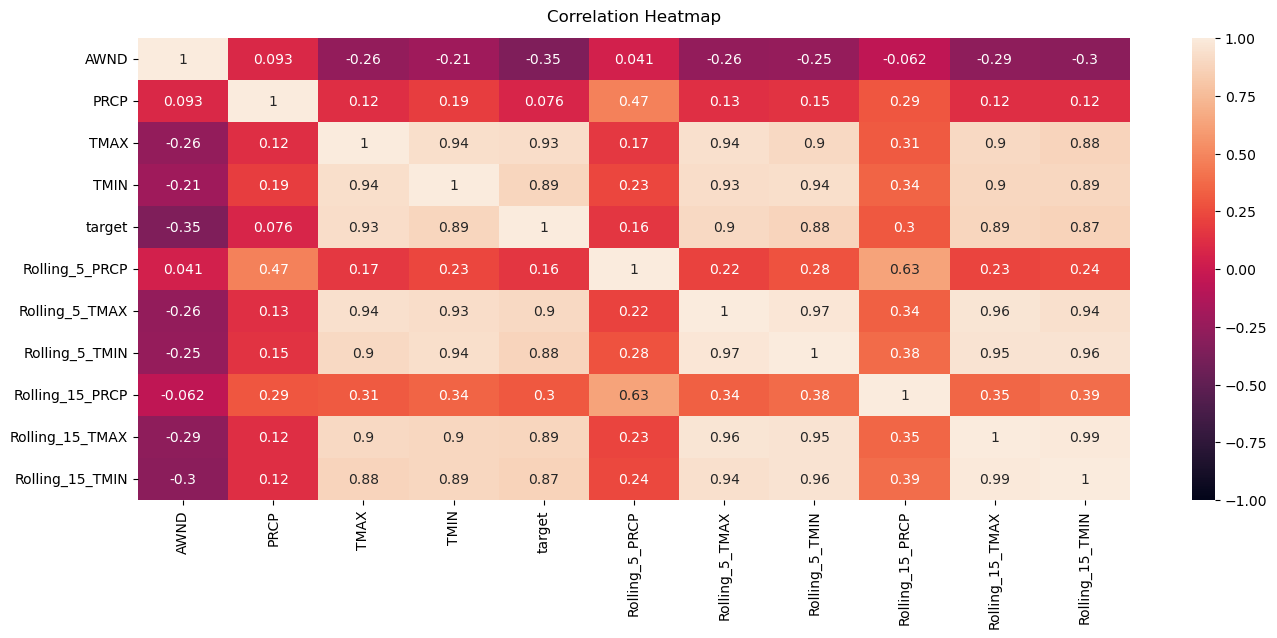

In [44]:
# Data Visualization (Correlation heatmap)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Ridge Regression - Model 2 :

('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN')

In [45]:
predictors_2 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_2

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN'],
      dtype='object')

In [46]:
predictions_2 = ridge_predictor(weather_df, model_1, predictors_2)
predictions_2

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,35.832934,3.832934
2021-01-17,27.0,34.149507,7.149507
2021-01-18,32.0,29.194769,2.805231
2021-01-19,33.0,31.182240,1.817760
2021-01-20,37.0,28.902933,8.097067
...,...,...,...
2021-12-27,35.0,45.709319,10.709319
2021-12-28,35.0,41.486240,6.486240
2021-12-29,35.0,40.264782,5.264782


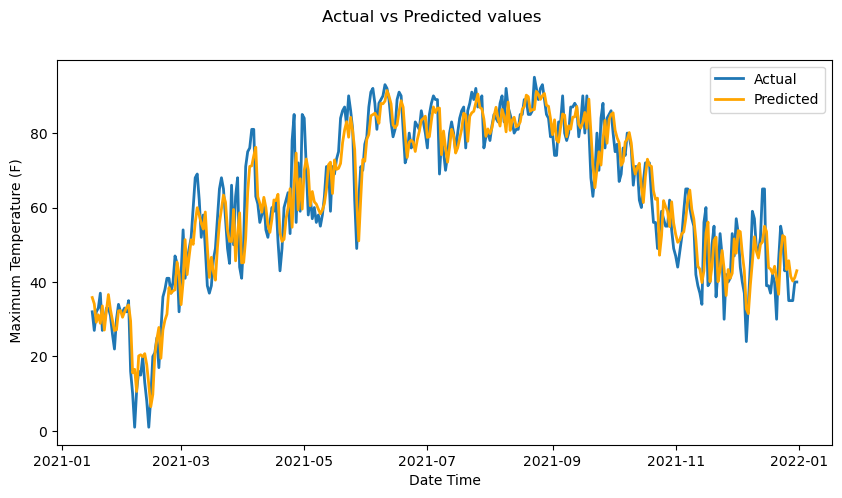

<Figure size 640x480 with 0 Axes>

In [47]:
lineplot(predictions_2)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


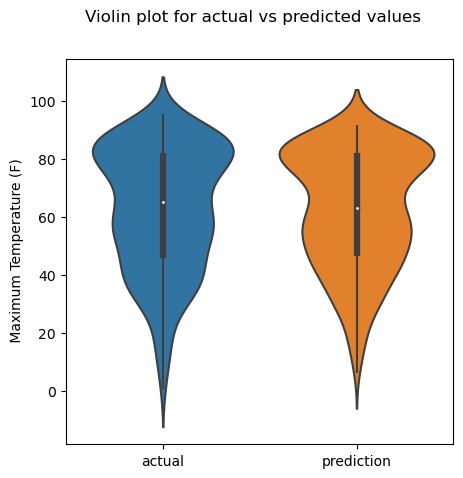

In [48]:
violinplot(predictions_2)

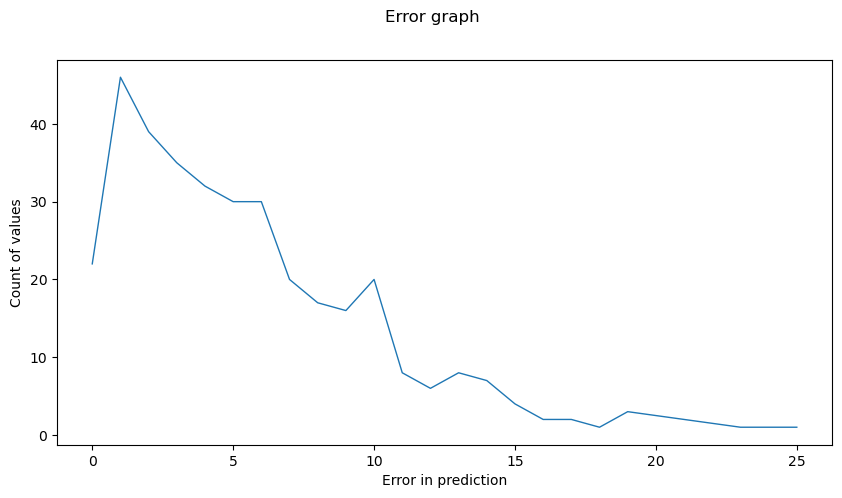

<Figure size 640x480 with 0 Axes>

In [49]:
errorgraph(predictions_2)

In [50]:
error = rmse_error(predictions_2['actual'],predictions_2['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.998810184326618


In [51]:
error = r2_error(predictions_2['actual'],predictions_2['prediction'])
print("R2 score  : ", error)

R2 score  :  0.8926029881799551


In [52]:
error = mab_error(predictions_2['actual'],predictions_2['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  5.456591811856767


### Expanding mean function to add more columns

In [53]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["PRCP", "TMAX", "TMIN"]:
    weather_df [f"Month_Avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys= False).apply(expand_mean)
    weather_df [f"Day_Avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys= False).apply(expand_mean)

C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\3127809325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df [f"Month_Avg_{col}"] = weather_df[col].groupby(weather_df.index.month, group_keys= False).apply(expand_mean)
C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\3127809325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df [f"Day_Avg_{col}"] = weather_df[col].groupby(weather_df.index.day_of_year, group_keys= False).apply(expand_mean)
C:\Users\PATEL\AppData\Local\Temp\ipykernel_

In [54]:
weather_df

,STATION,NAME,AWND,PRCP,TMAX,TMIN,target,Rolling_5_PRCP,Rolling_5_TMAX,Rolling_5_TMIN,Rolling_15_PRCP,Rolling_15_TMAX,Rolling_15_TMIN,Month_Avg_PRCP,Day_Avg_PRCP,Month_Avg_TMAX,Day_Avg_TMAX,Month_Avg_TMIN,Day_Avg_TMIN
DATE,,,,,,,,,,,,,,,,,,,
2000-01-16,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",14.99,0.00,35.0,24.0,26.0,0.000,34.6,18.0,0.027333,37.200000,23.066667,0.000000,0.000000,35.000000,35.000000,24.000000,24.000000
2000-01-17,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",11.41,0.01,26.0,20.0,33.0,0.002,32.6,17.6,0.027333,34.933333,22.066667,0.005000,0.010000,30.500000,26.000000,22.000000,20.000000
2000-01-18,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",9.62,0.00,33.0,17.0,27.0,0.002,32.6,18.6,0.016000,34.600000,21.200000,0.003333,0.000000,31.333333,33.000000,20.333333,17.000000
2000-01-19,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",4.92,0.28,27.0,12.0,18.0,0.058,32.6,19.4,0.034667,34.400000,20.733333,0.072500,0.280000,30.250000,27.000000,18.250000,12.000000
2000-01-20,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",13.20,0.00,18.0,-1.0,9.0,0.058,27.8,14.4,0.034667,33.933333,20.066667,0.058000,0.000000,27.800000,18.000000,14.400000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",10.96,0.17,45.0,31.0,35.0,0.084,48.2,25.4,0.030000,46.533333,26.266667,0.053776,0.046364,35.728614,35.500000,20.435103,20.954545
2021-12-28,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",6.71,0.24,35.0,29.0,35.0,0.132,46.0,26.6,0.046000,45.666667,26.400000,0.054050,0.178182,35.727541,35.727273,20.447717,20.954545
2021-12-29,USW00094892,"CHICAGO WEST CHICAGO DUPAGE AIRPORT, IL US",8.28,0.01,35.0,27.0,35.0,0.134,42.0,26.8,0.046000,44.533333,26.533333,0.053985,0.035909,35.726471,34.772727,20.457353,20.181818


C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\3841987238.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)


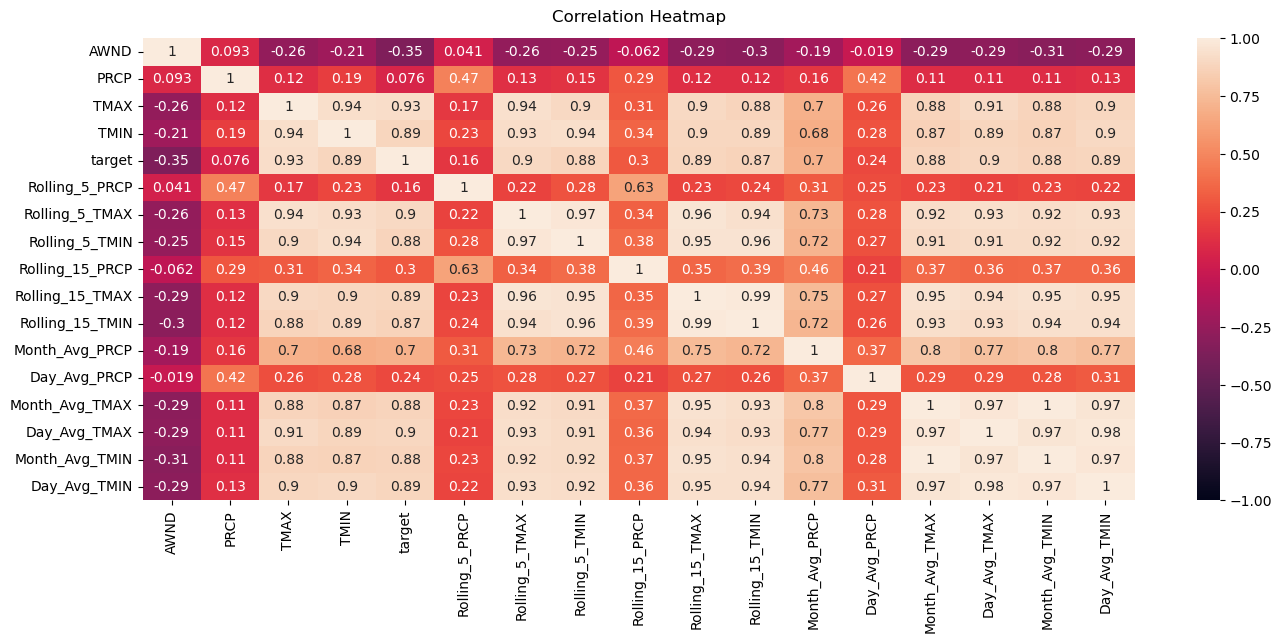

In [55]:
# Data Visualization using heatmap

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(weather_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Ridge Regression - Model 3: 
('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [56]:
predictors_3 = weather_df.columns[~weather_df.columns.isin(["target","STATION","NAME"])]
predictors_3

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX',
       'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [57]:
predictions_3 = ridge_predictor(weather_df, model_1, predictors_3)
predictions_3

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,35.120328,3.120328
2021-01-17,27.0,33.372714,6.372714
2021-01-18,32.0,28.782947,3.217053
2021-01-19,33.0,30.566700,2.433300
2021-01-20,37.0,27.849095,9.150905
...,...,...,...
2021-12-27,35.0,42.258866,7.258866
2021-12-28,35.0,38.569385,3.569385
2021-12-29,35.0,37.727215,2.727215


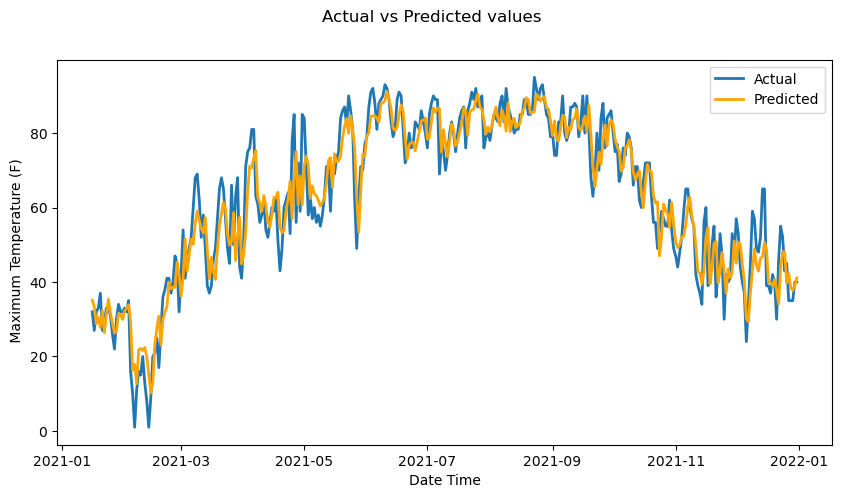

<Figure size 640x480 with 0 Axes>

In [58]:
lineplot(predictions_3)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


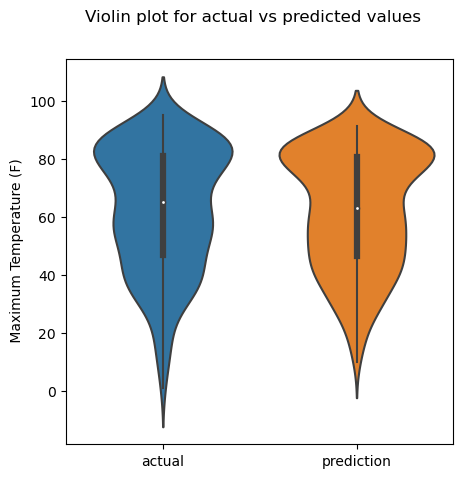

In [59]:
violinplot(predictions_3)

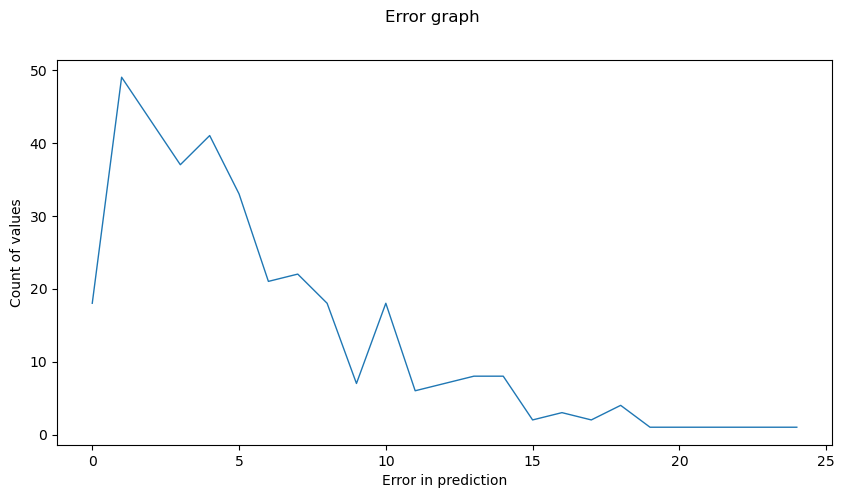

<Figure size 640x480 with 0 Axes>

In [60]:
errorgraph(predictions_3)

In [61]:
error = rmse_error(predictions_3['actual'],predictions_3['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.87221878757514


In [62]:
error = r2_error(predictions_3['actual'],predictions_3['prediction'])
print("R2 score  : ", error)

R2 score  :  0.8964529519104995


In [63]:
error = mab_error(predictions_3['actual'],predictions_3['prediction'])
print("Mean absolute error : ", error)

Mean absolute error :  5.310124973317275


## Linear Regression Model 1: ('AWND', 'PRCP', 'TMAX', 'TMIN')


In [64]:
# Having a look at our predictors
predictors_1

Index(['AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [65]:
# Calling the linear_predictor function to get the predicted values

predictions_1_linear = linear_predictor(weather_df, model_2, predictors_1)
predictions_1_linear

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,39.920751,7.920751
2021-01-17,27.0,37.522626,10.522626
2021-01-18,32.0,31.513518,0.486482
2021-01-19,33.0,33.647741,0.647741
2021-01-20,37.0,30.639465,6.360535
...,...,...,...
2021-12-27,35.0,45.609095,10.609095
2021-12-28,35.0,40.544733,5.544733
2021-12-29,35.0,39.752591,4.752591


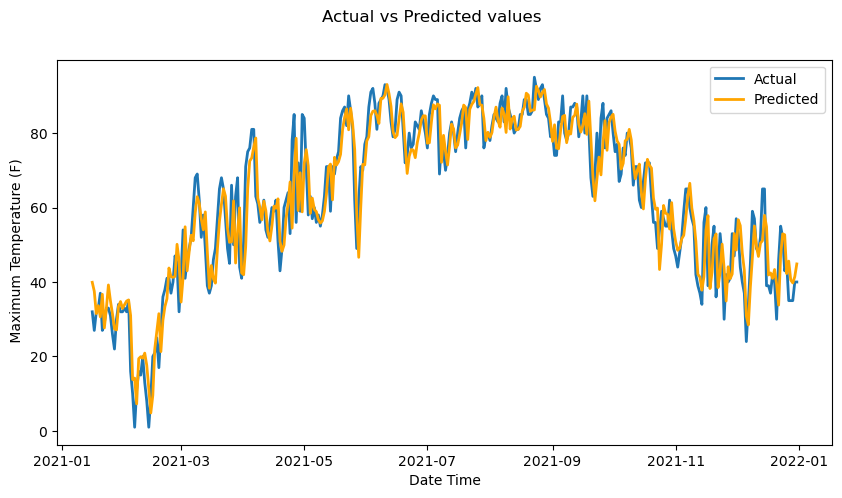

<Figure size 640x480 with 0 Axes>

In [66]:
lineplot(predictions_1_linear)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


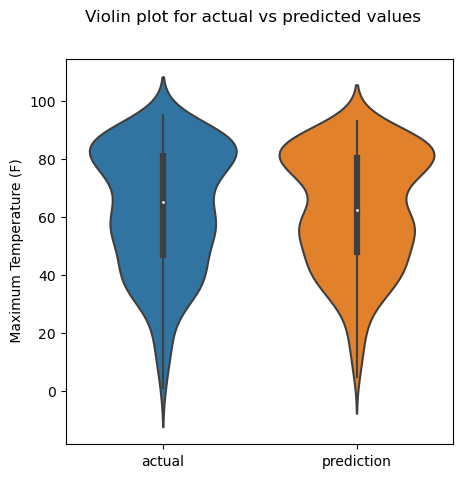

In [67]:
violinplot(predictions_1_linear)

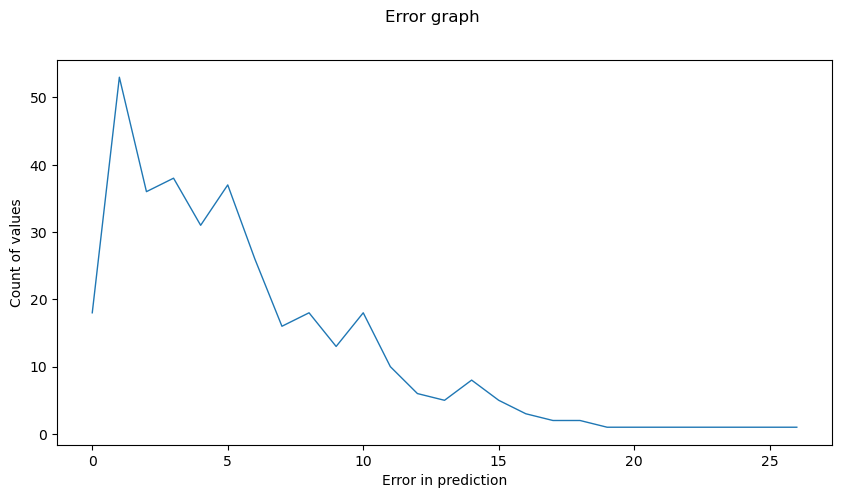

<Figure size 640x480 with 0 Axes>

In [68]:
errorgraph(predictions_1_linear)

In [69]:
# Calculating the model performance

error = rmse_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  7.128018293958363


In [70]:
error = r2_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8886009777842292


In [71]:
error = mab_error(predictions_1_linear['actual'],predictions_1_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.474656425916775


## Linear Regression Model 2: 
       ('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN' )

In [72]:
# Looking at our next set of predictors 
predictors_2

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN'],
      dtype='object')

In [73]:
# Calling the linear_predictor function to get the predicted values

predictions_2_linear = linear_predictor(weather_df, model_2, predictors_2)
predictions_2_linear

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,35.831393,3.831393
2021-01-17,27.0,34.148018,7.148018
2021-01-18,32.0,29.193287,2.806713
2021-01-19,33.0,31.180859,1.819141
2021-01-20,37.0,28.901556,8.098444
...,...,...,...
2021-12-27,35.0,45.708491,10.708491
2021-12-28,35.0,41.485474,6.485474
2021-12-29,35.0,40.264123,5.264123


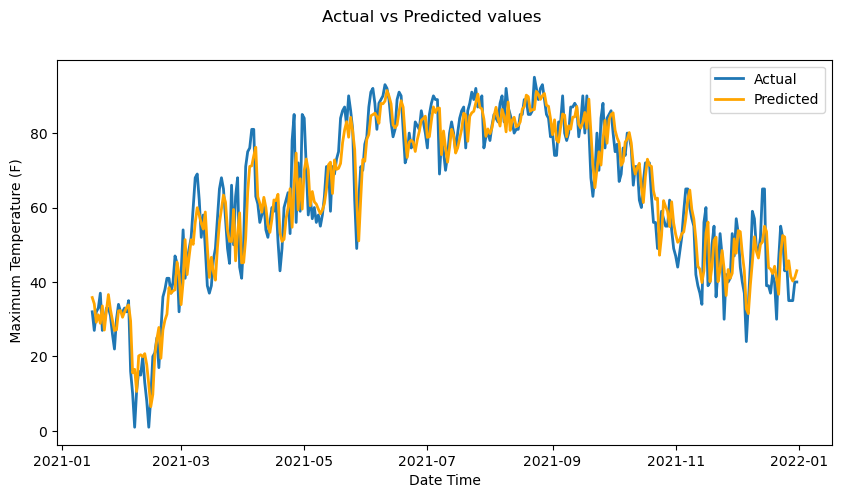

<Figure size 640x480 with 0 Axes>

In [74]:
lineplot(predictions_2_linear)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


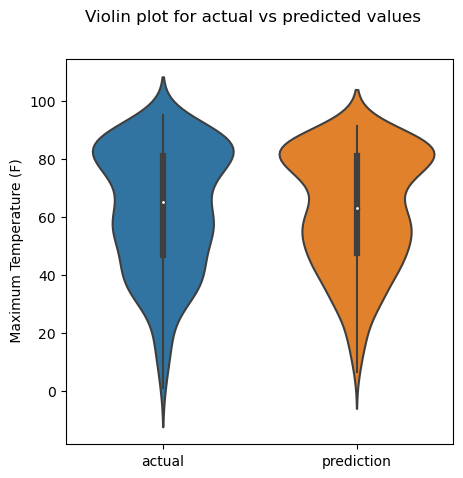

In [75]:
violinplot(predictions_2_linear)

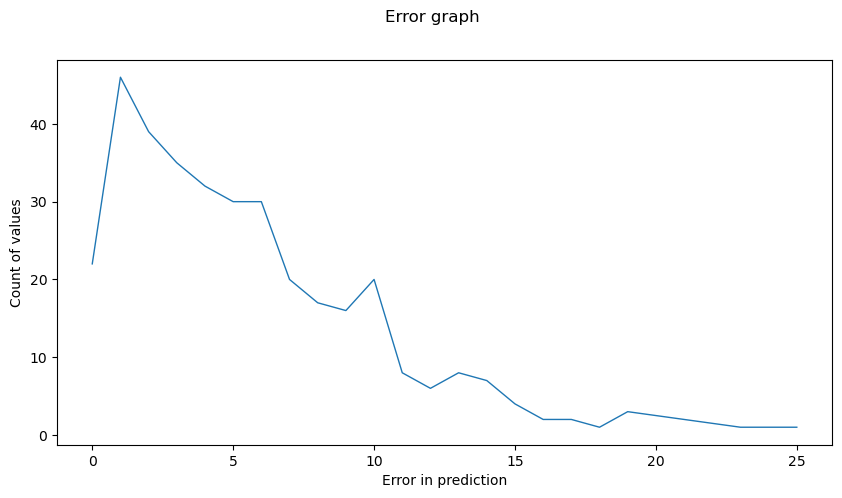

<Figure size 640x480 with 0 Axes>

In [76]:
errorgraph(predictions_2_linear)

In [77]:
# Calculating the model performance

error = rmse_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.9988303541512416


In [78]:
error = r2_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8926023691655919


In [79]:
error = mab_error(predictions_2_linear['actual'],predictions_2_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.456569686122275


## Linear Regression Model 3: 
     ( 'AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX',
       'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN' )

In [80]:
# Looking at our next set of predictors 
predictors_3 

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX',
       'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [81]:
# Calling the linear_predictor function to get the predicted values

predictions_3_linear = linear_predictor(weather_df, model_2, predictors_3)
predictions_3_linear

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,35.123376,3.123376
2021-01-17,27.0,33.375715,6.375715
2021-01-18,32.0,28.785833,3.214167
2021-01-19,33.0,30.569119,2.430881
2021-01-20,37.0,27.850974,9.149026
...,...,...,...
2021-12-27,35.0,42.260722,7.260722
2021-12-28,35.0,38.569774,3.569774
2021-12-29,35.0,37.729227,2.729227


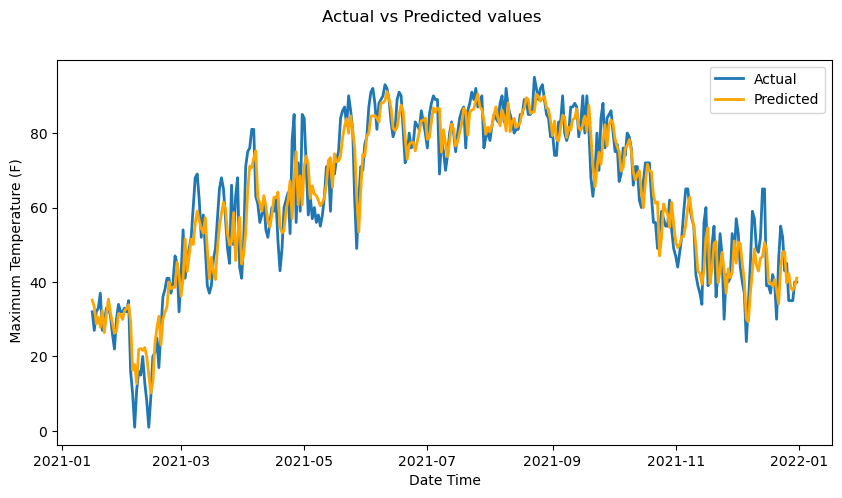

<Figure size 640x480 with 0 Axes>

In [82]:
lineplot(predictions_3_linear)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


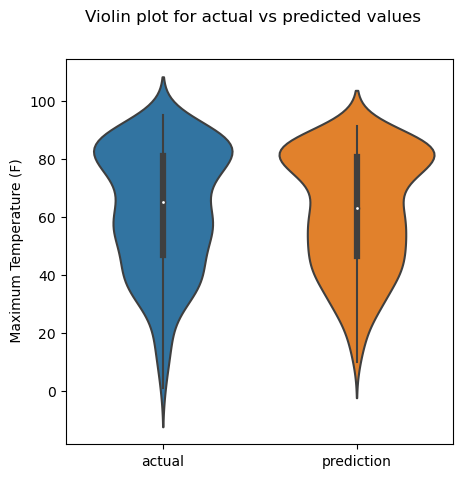

In [83]:
violinplot(predictions_3_linear)

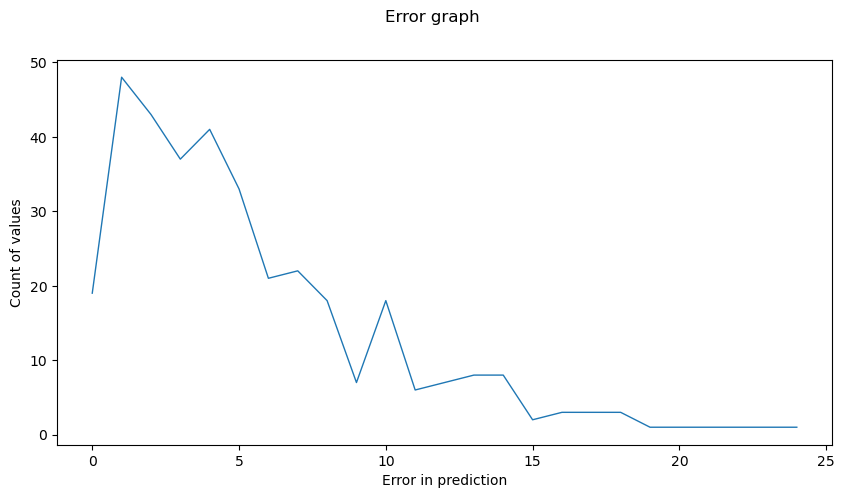

<Figure size 640x480 with 0 Axes>

In [84]:
errorgraph(predictions_3_linear)

In [85]:
# Calculating the model performance

error = rmse_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.8723478150155435


In [86]:
error = r2_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("R2 score: ", error)

R2 score:  0.8964490636361556


In [87]:
error = mab_error(predictions_3_linear['actual'],predictions_3_linear['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.310219550530115


## Lasso Regression Model 1: ('AWND', 'PRCP', 'TMAX', 'TMIN')

In [88]:
# Looking at the predictors
predictors_1

Index(['AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [89]:
# Calling the lasso_predictor function to get the predicted values

predictions_1_lasso = lasso_predictor(weather_df, model_3, predictors_1)
predictions_1_lasso

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,39.790867,7.790867
2021-01-17,27.0,37.406234,10.406234
2021-01-18,32.0,31.382572,0.617428
2021-01-19,33.0,33.631951,0.631951
2021-01-20,37.0,30.671524,6.328476
...,...,...,...
2021-12-27,35.0,45.715519,10.715519
2021-12-28,35.0,40.713469,5.713469
2021-12-29,35.0,39.585268,4.585268


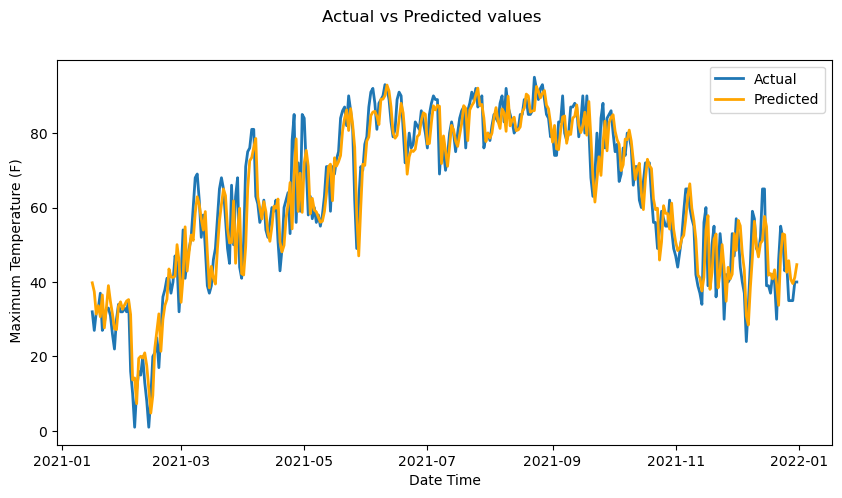

<Figure size 640x480 with 0 Axes>

In [90]:
lineplot(predictions_1_lasso)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


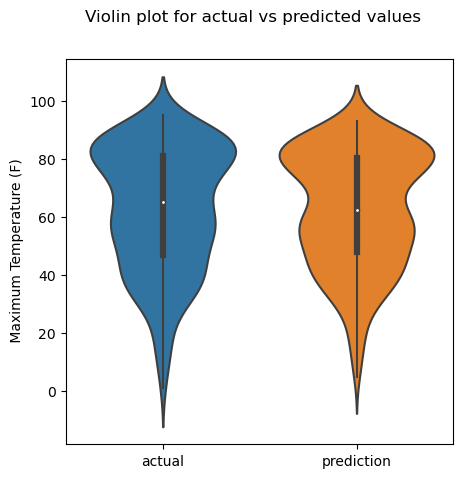

In [91]:
violinplot(predictions_1_lasso)

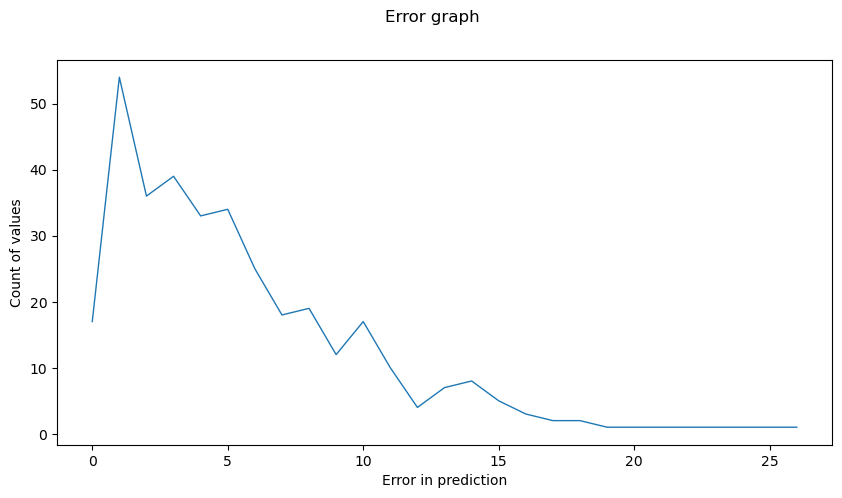

<Figure size 640x480 with 0 Axes>

In [92]:
errorgraph(predictions_1_lasso)

In [93]:
# Calculating the model performance

error = rmse_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  7.127159574961929


In [94]:
error = r2_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8886278168551922


In [95]:
error = mab_error(predictions_1_lasso['actual'],predictions_1_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.479063828317712


## Lasso Regression Model 2: 
    ('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN')


In [96]:
# Looking at the predictors 
predictors_2

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN'],
      dtype='object')

In [97]:
# Calling the lasso_predictor function to get the predicted values

predictions_2_lasso = lasso_predictor(weather_df, model_3, predictors_2)
predictions_2_lasso

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,36.360629,4.360629
2021-01-17,27.0,34.692805,7.692805
2021-01-18,32.0,29.762973,2.237027
2021-01-19,33.0,31.870556,1.129444
2021-01-20,37.0,29.630954,7.369046
...,...,...,...
2021-12-27,35.0,45.868229,10.868229
2021-12-28,35.0,41.668659,6.668659
2021-12-29,35.0,40.157360,5.157360


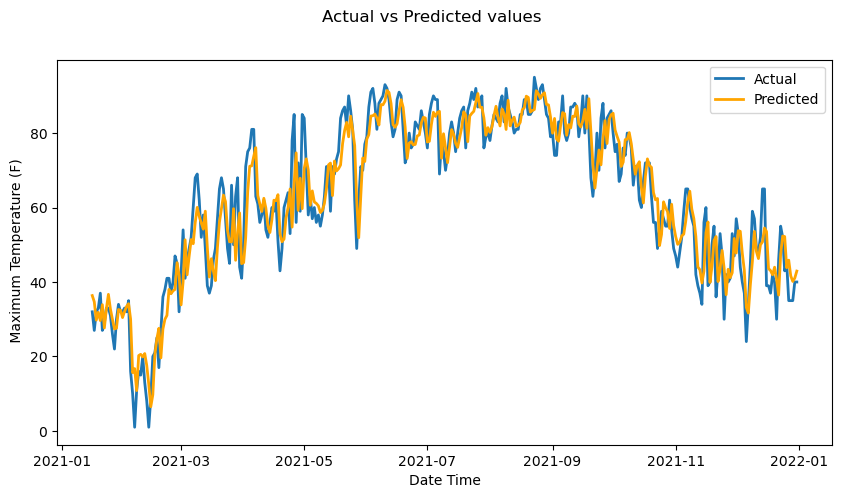

<Figure size 640x480 with 0 Axes>

In [98]:
lineplot(predictions_2_lasso)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


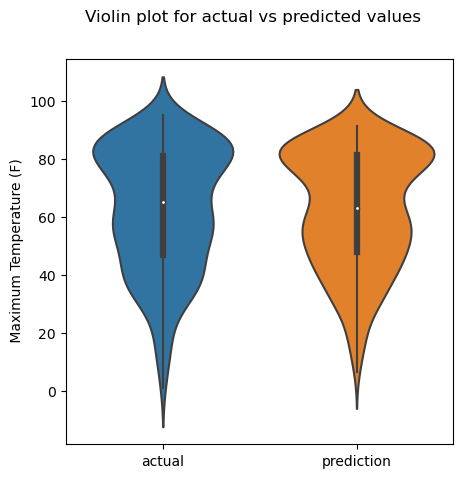

In [99]:
violinplot(predictions_2_lasso)

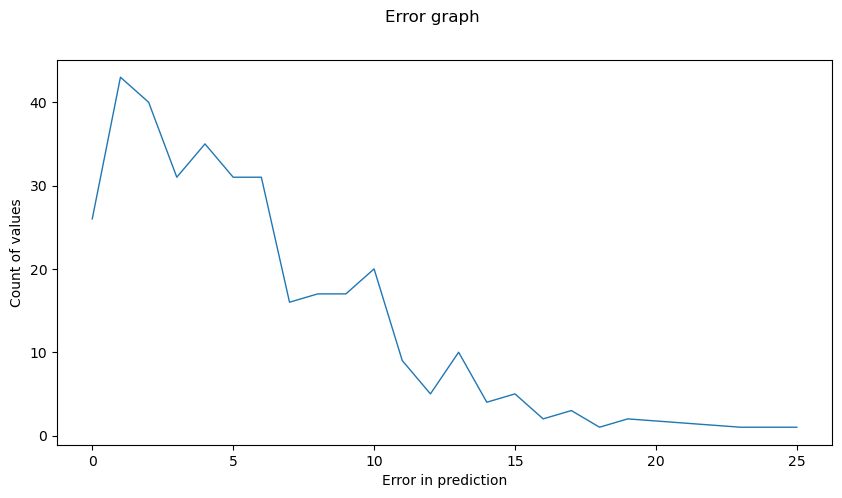

<Figure size 640x480 with 0 Axes>

In [100]:
errorgraph(predictions_2_lasso)

In [101]:
# Calculating the model performance

error = rmse_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  7.000471316709924


In [102]:
error = r2_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8925520018492062


In [103]:
error = mab_error(predictions_2_lasso['actual'],predictions_2_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.461073790688136


## Lasso Regression Model 3:
    ('AWND','PRCP','TMAX','TMIN', 'Rolling_5_PRCP','Rolling_5_TMAX','Rolling_5_TMIN','Rolling_15_PRCP','Rolling_15_TMAX',           'Rolling_15_TMIN','Month_Avg_PRCP','Day_Avg_PRCP','Month_Avg_TMAX','Day_Avg_TMAX','Month_Avg_TMIN','Day_Avg_TMIN')

In [104]:
# Looking at the predictors 
predictors_3

Index(['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX',
       'Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX',
       'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX',
       'Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN'],
      dtype='object')

In [105]:
# Calling the lasso_predictor function to get the predicted values

predictions_3_lasso = lasso_predictor(weather_df, model_3, predictors_3)
predictions_3_lasso

,actual,prediction,difference
DATE,,,
2021-01-16,32.0,35.131096,3.131096
2021-01-17,27.0,33.404575,6.404575
2021-01-18,32.0,28.850645,3.149355
2021-01-19,33.0,30.797855,2.202145
2021-01-20,37.0,28.180905,8.819095
...,...,...,...
2021-12-27,35.0,42.393975,7.393975
2021-12-28,35.0,38.826755,3.826755
2021-12-29,35.0,37.619029,2.619029


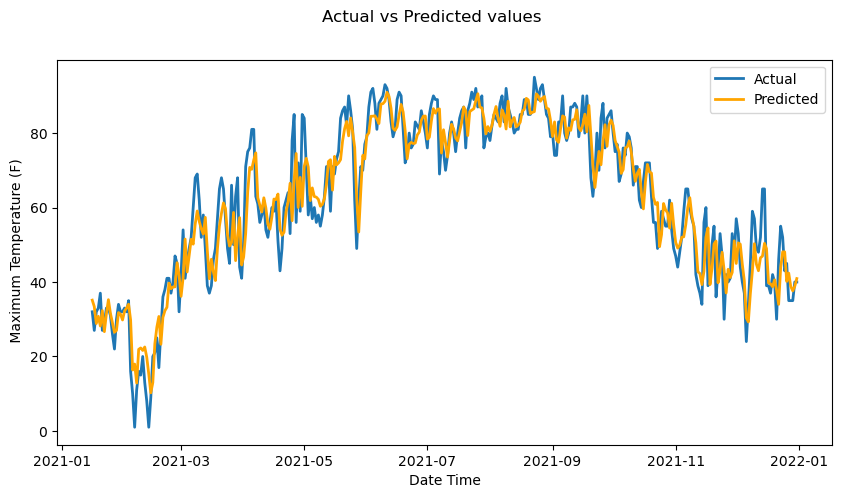

<Figure size 640x480 with 0 Axes>

In [106]:
lineplot(predictions_3_lasso)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


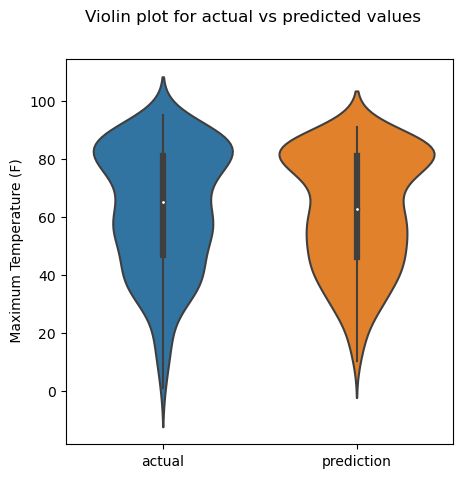

In [107]:
violinplot(predictions_3_lasso)

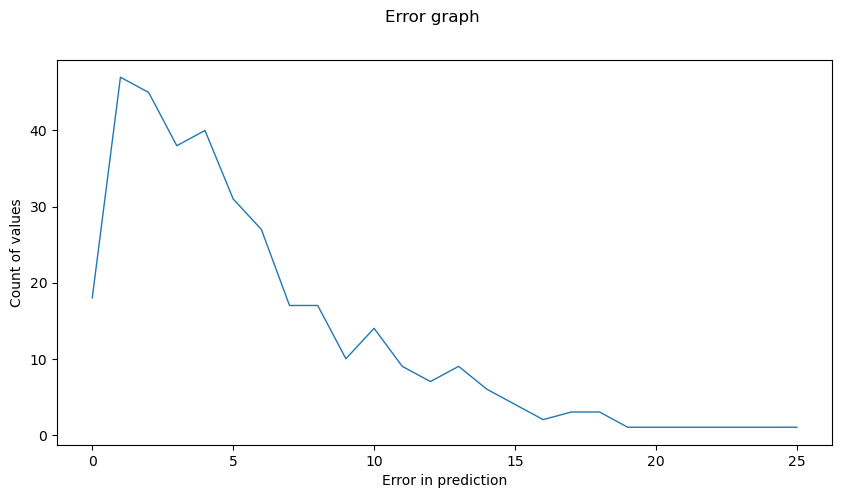

<Figure size 640x480 with 0 Axes>

In [108]:
errorgraph(predictions_3_lasso)

In [109]:
# Calculating the model performance

error = rmse_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.871455689359632


In [110]:
error = r2_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("R2 score: ", error)

R2 score:  0.8964759465743832


In [111]:
error = mab_error(predictions_3_lasso['actual'],predictions_3_lasso['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.315335952628786


### Splitting the dataset for the next 2 models:

In [112]:
train_dataset = weather_df.loc["2000-01-01" : "2020-12-31"] 

In [113]:
test_dataset = weather_df.loc["2021-01-01":]

In [114]:
x_train = train_dataset[['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN']]
x_test = test_dataset[['AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN']]

In [115]:
y_train = train_dataset[['target']]
y_test = test_dataset[['target']]

### Elastic Regression Model: 
 ('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', \'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [116]:
from sklearn.linear_model import ElasticNet 
enet = ElasticNet(alpha =1.0, l1_ratio = 0.5)

In [117]:
enet.fit(x_train, y_train)

ElasticNet()

In [118]:
y_pred = enet.predict(x_test)

In [119]:
preds = pd.DataFrame(y_pred, index=x_test.index, columns = ['prediction'])

In [120]:
preds = pd.concat([y_test['target'],preds['prediction']], axis=1)
preds.columns=["actual", "prediction"]
preds

,actual,prediction
DATE,,
2021-01-01,33.0,32.497219
2021-01-02,32.0,35.879472
2021-01-03,28.0,34.539945
2021-01-04,33.0,31.577599
2021-01-05,36.0,36.306710
...,...,...
2021-12-27,35.0,42.706956
2021-12-28,35.0,38.968007
2021-12-29,35.0,37.649501


In [121]:
# Calculating difference column in dataset

for i in preds:
    preds['difference']=(preds["actual"]-preds["prediction"]).abs()

preds

,actual,prediction,difference
DATE,,,
2021-01-01,33.0,32.497219,0.502781
2021-01-02,32.0,35.879472,3.879472
2021-01-03,28.0,34.539945,6.539945
2021-01-04,33.0,31.577599,1.422401
2021-01-05,36.0,36.306710,0.306710
...,...,...,...
2021-12-27,35.0,42.706956,7.706956
2021-12-28,35.0,38.968007,3.968007
2021-12-29,35.0,37.649501,2.649501


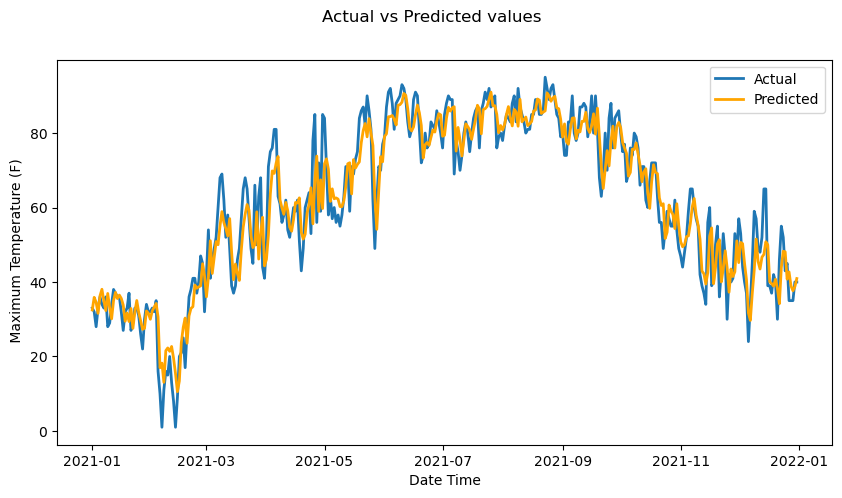

<Figure size 640x480 with 0 Axes>

In [122]:
lineplot(preds)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


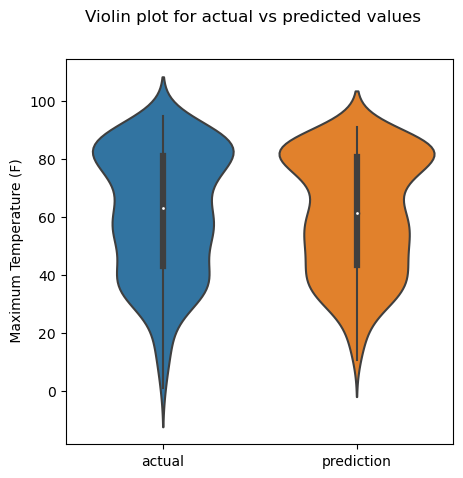

In [123]:
violinplot(preds)

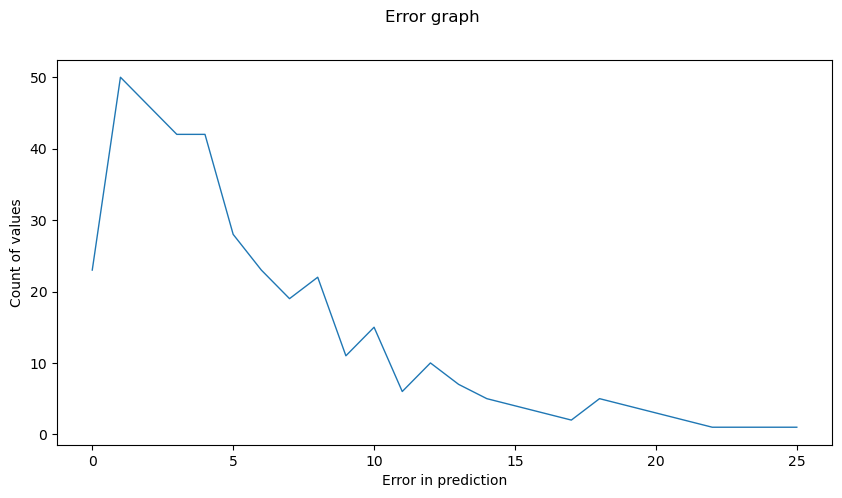

<Figure size 640x480 with 0 Axes>

In [124]:
errorgraph(preds)

In [125]:
error = rmse_error(preds['actual'],preds['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.790267574669209


In [126]:
error = r2_error(preds['actual'],preds['prediction'])
print("R2 score: ", error)

R2 score:  0.9021166045243685


In [127]:
error = mab_error(preds['actual'],preds['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.218041886899369


## Random Forest Regressor Model : 
('AWND', 'PRCP', 'TMAX', 'TMIN', 'Rolling_5_PRCP', 'Rolling_5_TMAX','Rolling_5_TMIN', 'Rolling_15_PRCP', 'Rolling_15_TMAX', 'Rolling_15_TMIN', 'Month_Avg_PRCP', 'Day_Avg_PRCP', 'Month_Avg_TMAX','Day_Avg_TMAX', 'Month_Avg_TMIN', 'Day_Avg_TMIN')

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 200 , random_state = 50)
rf.fit(x_train, y_train)

C:\Users\PATEL\AppData\Local\Temp\ipykernel_7748\3005394262.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=50)

In [129]:
y_pred_rf = rf.predict(x_test)

In [130]:
preds_rf = pd.DataFrame(y_pred_rf, index=x_test.index, columns = ['prediction'])
preds_rf = pd.concat([y_test['target'],preds_rf['prediction']], axis=1)
preds_rf.columns=["actual", "prediction"]
preds_rf

,actual,prediction
DATE,,
2021-01-01,33.0,28.765
2021-01-02,32.0,33.145
2021-01-03,28.0,32.630
2021-01-04,33.0,31.425
2021-01-05,36.0,34.310
...,...,...
2021-12-27,35.0,40.745
2021-12-28,35.0,35.210
2021-12-29,35.0,36.390


In [131]:
# Calculating difference column in dataset

for i in preds:
    preds_rf['difference']=(preds_rf["actual"]-preds_rf["prediction"]).abs()

preds_rf

,actual,prediction,difference
DATE,,,
2021-01-01,33.0,28.765,4.235
2021-01-02,32.0,33.145,1.145
2021-01-03,28.0,32.630,4.630
2021-01-04,33.0,31.425,1.575
2021-01-05,36.0,34.310,1.690
...,...,...,...
2021-12-27,35.0,40.745,5.745
2021-12-28,35.0,35.210,0.210
2021-12-29,35.0,36.390,1.390


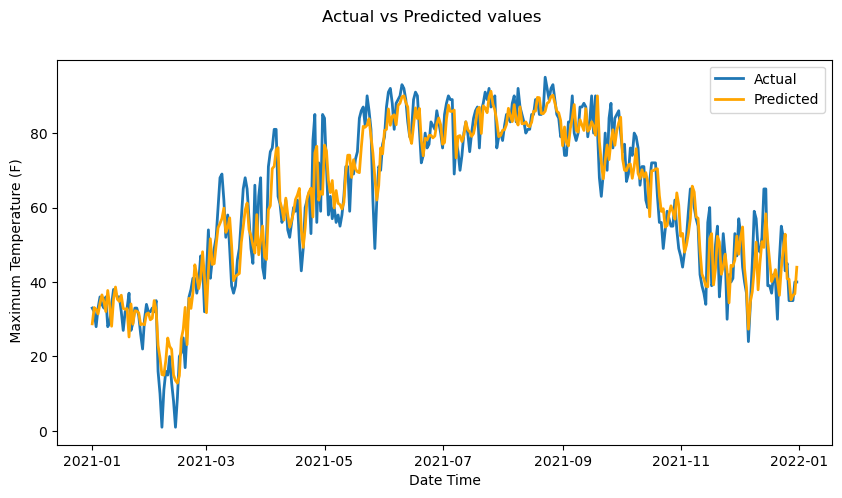

<Figure size 640x480 with 0 Axes>

In [132]:
lineplot(preds_rf)

C:\Users\PATEL\Desktop\Assignment3\env\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


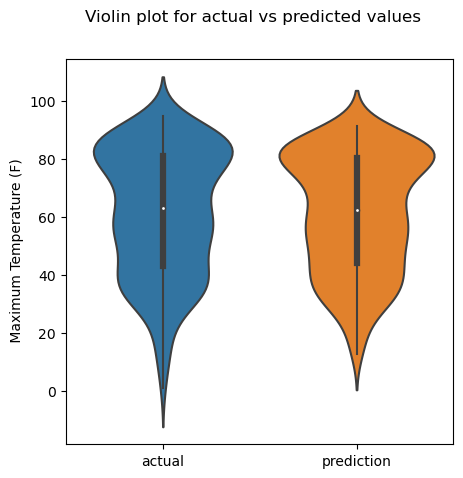

In [133]:
violinplot(preds_rf)

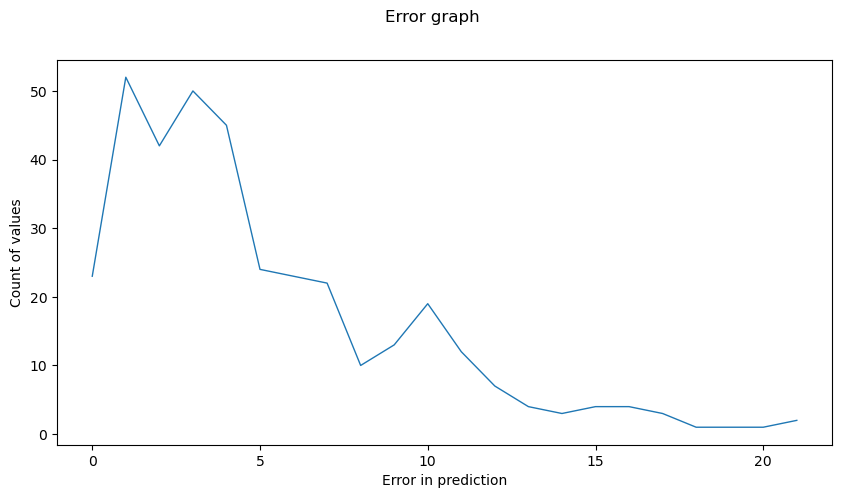

<Figure size 640x480 with 0 Axes>

In [134]:
errorgraph(preds_rf)

In [135]:
error = rmse_error(preds_rf['actual'],preds_rf['prediction'])
print("Root mean square error : ", error)

Root mean square error :  6.604369263778062


In [136]:
error = r2_error(preds_rf['actual'],preds_rf['prediction'])
print("R2 score: ", error)

R2 score:  0.9074027807442986


In [137]:
error = mab_error(preds_rf['actual'],preds_rf['prediction'])
print("Mean absolute: ", error)

Mean absolute:  5.06165296803653
